# Heat equation, Finite Difference, Direct Method
_Gilbert Francois Duivesteijn_

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from scipy.linalg import solve

Let's consider the following equation:

\begin{equation}
\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2} + f(x)
\end{equation}

When the heat equation is static over time, the $\frac{\partial u}{\partial t} = 0$. This is now an elliptic equation. In matrix notation, the equation can be written as:
\begin{equation}
\begin{bmatrix}
0 \\
\vdots \\
0
\end{bmatrix} = \kappa \frac{1}{\Delta x^2}\begin{bmatrix}
\ddots &        &  0 \\
       & \ddots &   \\
  0    &        & \ddots
\end{bmatrix} \begin{bmatrix}
u_1 \\
\vdots \\
u_{n-1}
\end{bmatrix}
+
\begin{bmatrix}
b_1 \\
\vdots \\
b_{n-1}
\end{bmatrix}
+
\begin{bmatrix}
f_1 \\
\vdots \\
f_{n-1}
\end{bmatrix}
\end{equation}
and
\begin{equation}
f_i := f(i\Delta x)
\end{equation}

This is a system of equations that can be solved with a direct method.

## Example 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from scipy.linalg import solve

In [2]:
# Constant kappa
k = 0.001

# Spacial domain
n = 100
L = 1
dx = L / n
x = np.linspace(0, L, n)

# Boundary conditions
U0 = 1
Un = -1

# Initial condition, u(x,0)=0
Uinit = np.zeros(shape=(n,))

# Discretization matrix A
A = k/dx**2 * toeplitz([-2.0, 1.0] + [0.0]*(n-2))

# Vector with boundary conditions b
b = np.zeros(shape=(n))
b[0] = k/dx**2 * U0
b[n-1] = k/dx**2 * Un

# Discretize spacial function f(x)=cos(x)
f = 3e-2 * np.cos(3*np.pi*x)

In [3]:
print("\nA =")
print(A)
print("\nb =")
print(b)
print("\nx =")
print(x)
print("\nf =")
print(f)


A =
[[-20.  10.   0. ...   0.   0.   0.]
 [ 10. -20.  10. ...   0.   0.   0.]
 [  0.  10. -20. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... -20.  10.   0.]
 [  0.   0.   0. ...  10. -20.  10.]
 [  0.   0.   0. ...   0.  10. -20.]]

b =
[ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. -10.]

x =
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.

In [4]:
u_Ab = solve(A, -b)

u_Abf = solve(A, -b-f)

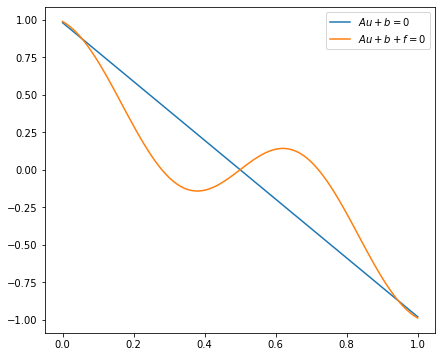

In [5]:
plt.figure(figsize=(7, 6))
plt.plot(x, u_Ab, label="$Au + b = 0$")
plt.plot(x, u_Abf, label="$Au + b + f = 0$")
plt.legend()
plt.show()